In [52]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv("data/GOOGL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-25,743.840027,752.460022,732.500000,733.619995,733.619995,2267000
1,2016-01-26,735.210022,739.460022,726.969971,733.789978,733.789978,1547000
2,2016-01-27,735.890015,735.890015,713.450012,717.580017,717.580017,2121400
3,2016-01-28,738.190002,751.159973,730.599976,748.299988,748.299988,3105200
4,2016-01-29,748.960022,765.109985,744.200012,761.349976,761.349976,3790400


In [54]:
type(data)

pandas.core.frame.DataFrame

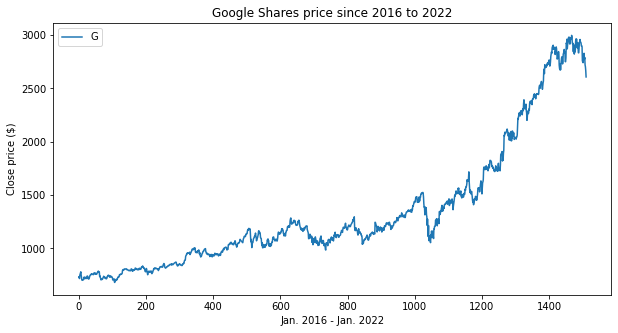

In [55]:
# draw data
plt.figure(figsize = (10, 5))
plt.plot(data['Close'], label = 'Google Stock')
plt.title("Google Shares price since 2016 to 2022")
plt.xlabel("Jan. 2016 - Jan. 2022")
plt.ylabel("Close price ($)")
plt.legend("Google")
plt.show()

In [56]:
simple_moving_avg_30 = pd.DataFrame()
simple_moving_avg_30['Close'] = data['Close'].rolling(window = 30).mean()
simple_moving_avg_30

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1506,2872.762004
1507,2868.759668
1508,2863.400667
1509,2854.092668


In [57]:
simple_moving_avg_30[simple_moving_avg_30.index == 28]

,Close
28,NaN


In [58]:
simple_moving_avg_100 = pd.DataFrame()
simple_moving_avg_100['Close'] = data['Close'].rolling(window = 100).mean()
simple_moving_avg_100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1506,2859.795308
1507,2858.579106
1508,2857.314307
1509,2855.175005


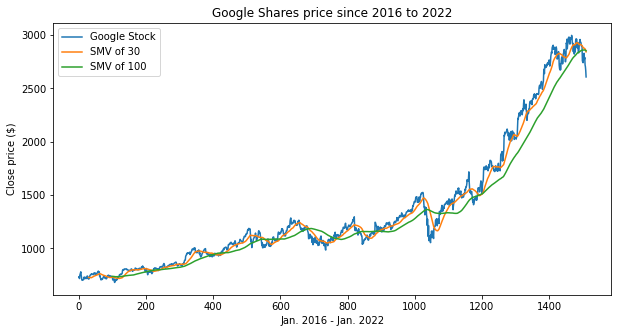

In [27]:
plt.figure(figsize = (10, 5))
plt.plot(data['Close'], label = 'Google Stock')
plt.plot(simple_moving_avg_30['Close'], label = 'SMV of 30')
plt.plot(simple_moving_avg_100['Close'], label = "SMV of 100")
plt.title("Google Shares price since 2016 to 2022")
plt.xlabel("Jan. 2016 - Jan. 2022")
plt.ylabel("Close price ($)")
plt.legend(loc = "upper left")
plt.show()

In [30]:
data_mix = pd.DataFrame()
data_mix["Google"] = data['Close']
data_mix["SMV30"] = simple_moving_avg_30['Close']
data_mix["SMV100"] = simple_moving_avg_100['Close']
data_mix

,Google,SMV30,SMV100
0,733.619995,NaN,NaN
1,733.789978,NaN,NaN
2,717.580017,NaN,NaN
3,748.299988,NaN,NaN
4,761.349976,NaN,NaN
...,...,...,...
1506,2789.610107,2872.762004,2859.795308
1507,2719.959961,2868.759668,2858.579106
1508,2702.330078,2863.400667,2857.314307
1509,2666.149902,2854.092668,2855.175005


In [76]:
def signal(data):
    buy = []
    sell = []
    status = 0 # condition

    for day in range(len(data)):
        if data["SMV30"][day] > data["SMV100"][day]:
            if status != 1:
                buy.append(data["Google"][day])
                sell.append(np.nan)
                status = 1
            else:
                buy.append(np.nan)
                sell.append(np.nan)
        elif data["SMV30"][day] < data["SMV100"][day]:
            if status != -1:
                sell.append(data["Google"][day])
                buy.append(np.nan)
                status = -1
            else:
                buy.append(np.nan)
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return(buy, sell)

In [35]:
len(data_mix)

1511

In [42]:
print(data_mix["SMV30"][100])
print(data_mix["SMV100"][100])

731.76167
738.53989871


In [77]:
signals = signal(data_mix)

In [73]:
signals[0]
signals[1]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 732.190002,
 724.25,
 704.25,
 706.130005,
 708.880005,
 710.469971,
 714.869995,
 685.200012,
 681.140015,
 691.26001,
 695.190002,
 703.530029,
 710.25,
 704.890015,
 708.969971,
 707.26001,
 717.780029,
 727.200012,
 732.51001,
 729.47998,
 735.799988,
 735.630005,
 753.200012,
 753.409973,
 757.080017,
 754.409973,
 759.280029,
 757.52002,
 757.650024,
 761.969971,
 765.840027,
 791.340027,
 800.94

In [78]:
data_mix["Buy"] = signals[0]
data_mix["Sell"] = signals[1]
data_mix

,Google,SMV30,SMV100,Buy,sell,Sell
0,733.619995,NaN,NaN,NaN,NaN,NaN
1,733.789978,NaN,NaN,NaN,NaN,NaN
2,717.580017,NaN,NaN,NaN,NaN,NaN
3,748.299988,NaN,NaN,NaN,NaN,NaN
4,761.349976,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1506,2789.610107,2872.762004,2859.795308,NaN,NaN,NaN
1507,2719.959961,2868.759668,2858.579106,NaN,NaN,NaN
1508,2702.330078,2863.400667,2857.314307,NaN,NaN,NaN
1509,2666.149902,2854.092668,2855.175005,NaN,2666.149902,2666.149902


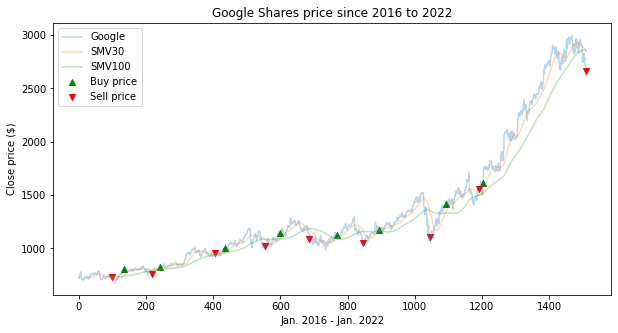

In [81]:
plt.figure(figsize = (10,5))
plt.plot(data_mix["Google"], label = "Google", alpha = 0.3)
plt.plot(data_mix["SMV30"], label = "SMV30", alpha = 0.3)
plt.plot(data_mix["SMV100"], label = "SMV100", alpha = 0.3)
plt.scatter(data_mix.index, data_mix["Buy"], label = "Buy price", marker = "^", color = "green")
plt.scatter(data_mix.index, data_mix["Sell"], label = "Sell price", marker = "v", color = "red")
plt.title("Google Shares price since 2016 to 2022")
plt.xlabel("Jan. 2016 - Jan. 2022")
plt.ylabel("Close price ($)")
plt.legend(loc = "upper left")
plt.show()